In [1]:
from google.colab import auth
import numpy as np
from scipy.stats import norm
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
myfile = drive.CreateFile({'id': '1rrmFkhWazx-oVI__nllfb5mbG3UEdbSX'})

In [16]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
myfile.GetContentFile('education.csv')

In [4]:
import pandas as pd
df = pd.read_csv('education.csv')

In [5]:
df

,DATE,GCT1502WA,GCT1502AL,GCT1502CA,GCT1502NY,GCT1502TX,GCT1502WY
0,01/01/2006,30.5,21.1,29.0,31.2,24.7,22.7
1,01/01/2007,30.3,21.4,29.5,31.7,25.2,23.4
2,01/01/2008,30.7,22.0,29.6,31.9,25.3,23.6
3,01/01/2009,31.0,22.0,29.9,32.4,25.5,23.8
4,01/01/2010,31.1,21.9,30.1,32.5,25.9,24.1
5,01/01/2011,31.9,22.3,30.3,32.9,26.4,24.7
6,01/01/2012,31.7,23.3,30.9,33.4,26.7,24.7
7,01/01/2013,32.7,23.5,31.0,34.1,27.5,26.6
8,01/01/2014,33.1,23.5,31.7,34.5,27.8,26.6
9,01/01/2015,34.2,24.2,32.3,35.0,28.4,26.2


In [6]:
df = df.rename(columns={'DATE': 'Date', 'GCT1502WA': 'Washington', 'GCT1502CA': 'California', 'GCT1502NY': 'New York', 'GCT1502TX': 'Texas', 'GCT1502WY': 'Wyoming', 'GCT1502AL': 'Alabama'})

In [7]:
df

,Date,Washington,Alabama,California,New York,Texas,Wyoming
0,01/01/2006,30.5,21.1,29.0,31.2,24.7,22.7
1,01/01/2007,30.3,21.4,29.5,31.7,25.2,23.4
2,01/01/2008,30.7,22.0,29.6,31.9,25.3,23.6
3,01/01/2009,31.0,22.0,29.9,32.4,25.5,23.8
4,01/01/2010,31.1,21.9,30.1,32.5,25.9,24.1
5,01/01/2011,31.9,22.3,30.3,32.9,26.4,24.7
6,01/01/2012,31.7,23.3,30.9,33.4,26.7,24.7
7,01/01/2013,32.7,23.5,31.0,34.1,27.5,26.6
8,01/01/2014,33.1,23.5,31.7,34.5,27.8,26.6
9,01/01/2015,34.2,24.2,32.3,35.0,28.4,26.2


In [8]:
dfD = df.iloc[ 0:14, [1,3,4] ].mean(axis=1)

In [9]:
dfR = df.iloc[ 0:14, [2,5,6] ].mean(axis=1)

In [10]:
df['RED'] = dfR
df['BLUE'] = dfD

In [11]:
df

,Date,Washington,Alabama,California,New York,Texas,Wyoming,RED,BLUE
0,01/01/2006,30.5,21.1,29.0,31.2,24.7,22.7,22.833333,30.233333
1,01/01/2007,30.3,21.4,29.5,31.7,25.2,23.4,23.333333,30.500000
2,01/01/2008,30.7,22.0,29.6,31.9,25.3,23.6,23.633333,30.733333
3,01/01/2009,31.0,22.0,29.9,32.4,25.5,23.8,23.766667,31.100000
4,01/01/2010,31.1,21.9,30.1,32.5,25.9,24.1,23.966667,31.233333
5,01/01/2011,31.9,22.3,30.3,32.9,26.4,24.7,24.466667,31.700000
6,01/01/2012,31.7,23.3,30.9,33.4,26.7,24.7,24.900000,32.000000
7,01/01/2013,32.7,23.5,31.0,34.1,27.5,26.6,25.866667,32.600000
8,01/01/2014,33.1,23.5,31.7,34.5,27.8,26.6,25.966667,33.100000
9,01/01/2015,34.2,24.2,32.3,35.0,28.4,26.2,26.266667,33.833333


In [12]:
df[ ['Date', 'RED', 'BLUE'] ].to_csv('educationaverage.csv')

In [13]:
mu, std = norm.fit(dfR)

In [15]:
std

1.7700151170934182

In [21]:
from statistics import NormalDist

ImportError: ignored

In [17]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [20]:
normpdf(7,5,5)
norm(5,5).pdf(7)

0.07365402806066466

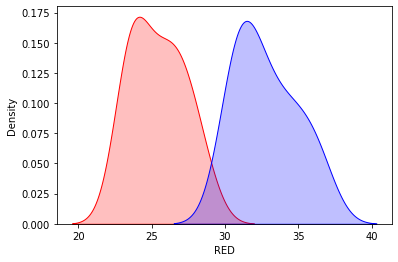

In [ ]:
fig = sns.kdeplot(df['RED'], shade=True, color="r")
fig = sns.kdeplot(df['BLUE'], shade=True, color="b")
plt.show()